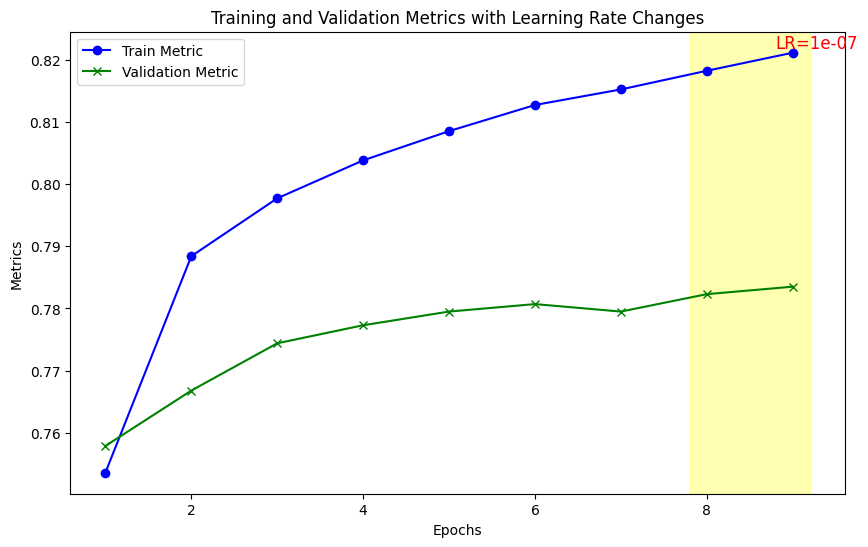

In [5]:
import matplotlib.pyplot as plt

# Example Data (substitute this with your actual data)
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_metrics = [0.7536, 0.7884, 0.7977, 0.8038, 0.8085, 0.8127, 0.8152, 0.8182, 0.8211]
validation_metrics = [0.7579, 0.7668, 0.7744, 0.7773, 0.7795, 0.7807, 0.7795, 0.7823, 0.7835]
learning_rates = [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-07]

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_metrics, label="Train Metric", marker='o', color='blue')
plt.plot(epochs, validation_metrics, label="Validation Metric", marker='x', color='green')

# Highlight learning rate changes
for i in range(1, len(learning_rates)):
    if learning_rates[i] != learning_rates[i-1]:
        plt.axvspan(epochs[i-1] - 0.2, epochs[i] + 0.2, color='yellow', alpha=0.3)
        plt.text(epochs[i] - 0.2, max(train_metrics), f'LR={learning_rates[i]:.0e}', 
                 color='red', fontsize=12, verticalalignment='bottom')

# Labels and title
plt.title("Training and Validation Metrics with Learning Rate Changes")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()

# Display plot
plt.show()


In [1]:
import re
import matplotlib.pyplot as plt

# Log data (simulating your log content)
log_data = """
2024-10-23 20:13:34,560 - INFO - Results directory: /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5
2024-10-23 20:13:34,561 - INFO - Batch size: 16, Epochs: 30, Stop shuffle: False, Save model: True
2024-10-23 21:57:52,374 - INFO - Validation | Loss: 12.2445 | Metrics: {'Metric': 0.7579} | MSE: 3.7432
2024-10-23 21:57:52,374 - INFO - Current learning rate: 1e-06
2024-10-23 21:57:52,769 - INFO - Model saved to /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5/model
2024-10-23 21:57:52,771 - INFO - Epoch 1/30 | Train metrics: Metric: 0.7536 | MSE: 3.7841
2024-10-23 23:23:04,555 - INFO - Validation | Loss: 12.2162 | Metrics: {'Metric': 0.7668} | MSE: 3.3682
2024-10-23 23:23:04,555 - INFO - Current learning rate: 1e-06
2024-10-23 23:23:05,679 - INFO - Model saved to /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5/model
2024-10-23 23:23:05,680 - INFO - Epoch 2/30 | Train metrics: Metric: 0.7884 | MSE: 2.7226
2024-10-24 00:54:59,103 - INFO - Validation | Loss: 12.1926 | Metrics: {'Metric': 0.7744} | MSE: 3.18
2024-10-24 00:54:59,103 - INFO - Current learning rate: 1e-06
2024-10-24 00:55:00,147 - INFO - Model saved to /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5/model
2024-10-24 00:55:00,148 - INFO - Epoch 3/30 | Train metrics: Metric: 0.7977 | MSE: 2.5045
2024-10-24 02:22:40,803 - INFO - Validation | Loss: 12.1821 | Metrics: {'Metric': 0.7773} | MSE: 3.1084
2024-10-24 02:22:40,803 - INFO - Current learning rate: 1e-06
2024-10-24 02:22:41,998 - INFO - Model saved to /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5/model
2024-10-24 02:22:42,000 - INFO - Epoch 4/30 | Train metrics: Metric: 0.8038 | MSE: 2.3994
2024-10-24 03:51:56,925 - INFO - Validation | Loss: 12.1828 | Metrics: {'Metric': 0.7795} | MSE: 3.0615
2024-10-24 03:51:56,926 - INFO - Current learning rate: 1e-06
2024-10-24 03:51:56,927 - INFO - Epoch 5/30 | Train metrics: Metric: 0.8085 | MSE: 2.3126
2024-10-24 05:26:49,334 - INFO - Validation | Loss: 12.1746 | Metrics: {'Metric': 0.7807} | MSE: 3.0455
2024-10-24 05:26:49,334 - INFO - Current learning rate: 1e-06
2024-10-24 05:26:50,728 - INFO - Model saved to /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5/model
2024-10-24 05:26:50,730 - INFO - Epoch 6/30 | Train metrics: Metric: 0.8127 | MSE: 2.2546
2024-10-24 06:54:11,107 - INFO - Validation | Loss: 12.1865 | Metrics: {'Metric': 0.7795} | MSE: 3.1552
2024-10-24 06:54:11,107 - INFO - Current learning rate: 1e-06
2024-10-24 06:54:11,108 - INFO - Epoch 7/30 | Train metrics: Metric: 0.8152 | MSE: 2.1862
2024-10-24 08:28:35,273 - INFO - Validation | Loss: 12.1794 | Metrics: {'Metric': 0.7823} | MSE: 3.0707
2024-10-24 08:28:35,273 - INFO - Current learning rate: 1e-06
2024-10-24 08:28:35,274 - INFO - Epoch 8/30 | Train metrics: Metric: 0.8182 | MSE: 2.1517
2024-10-24 10:14:41,353 - INFO - Validation | Loss: 12.1779 | Metrics: {'Metric': 0.7829} | MSE: 3.0479
2024-10-24 10:14:41,354 - INFO - Current learning rate: 1e-07
2024-10-24 10:14:41,355 - INFO - Epoch 9/30 | Train metrics: Metric: 0.8211 | MSE: 2.0883
2024-10-24 11:45:44,504 - INFO - Validation | Loss: 12.1790 | Metrics: {'Metric': 0.7835} | MSE: 2.9946
2024-10-24 11:45:44,504 - INFO - Current learning rate: 1e-07
2024-10-24 11:45:44,504 - INFO - Early stopping triggered.
2024-10-24 11:45:44,504 - INFO - Training completed.
2024-10-24 11:54:45,613 - INFO - CSV file saved successfully at /srv/CLAP/3_1_Results/2024-10-23_20-13_1_0_0_0_-1.0_0.5/predicted_true_values_2024-10-23_20-13-36_1_0_0_0_-1.0_0.5_results.csv
2024-10-24 11:54:46,823 - INFO - Results directory: /srv/CLAP/3_1_Results/2024-10-24_11-54_1_0_0_0_0.1_0.5
"""

# Define regular expressions
epoch_pattern = re.compile(r"Epoch (\d+)/30")
validation_loss_pattern = re.compile(r"Validation \| Loss: ([\d.]+)")
validation_metric_pattern = re.compile(r"Validation \| Loss: [\d.]+ \| Metrics: \{'Metric': ([\d.]+)\}")
learning_rate_pattern = re.compile(r"Current learning rate: ([\d.e+-]+)")

# Lists to store extracted data
epochs = [0]  # Start epochs from 0
validation_loss = []
validation_metrics = []
learning_rates = []

# Iterate through the log data
for line in log_data.splitlines():
    epoch_match = epoch_pattern.search(line)
    if epoch_match:
        epochs.append(int(epoch_match.group(1)))
        
    validation_loss_match = validation_loss_pattern.search(line)
    if validation_loss_match:
        validation_loss.append(float(validation_loss_match.group(1)))
        
    validation_metric_match = validation_metric_pattern.search(line)
    if validation_metric_match:
        validation_metrics.append(float(validation_metric_match.group(1)))
        
    learning_rate_match = learning_rate_pattern.search(line)
    if learning_rate_match:
        learning_rates.append(float(learning_rate_match.group(1)))  # Extract the learning rate value



C:\Users\wout.decrop\AppData\Local\Temp\ipykernel_20620\470709445.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10')


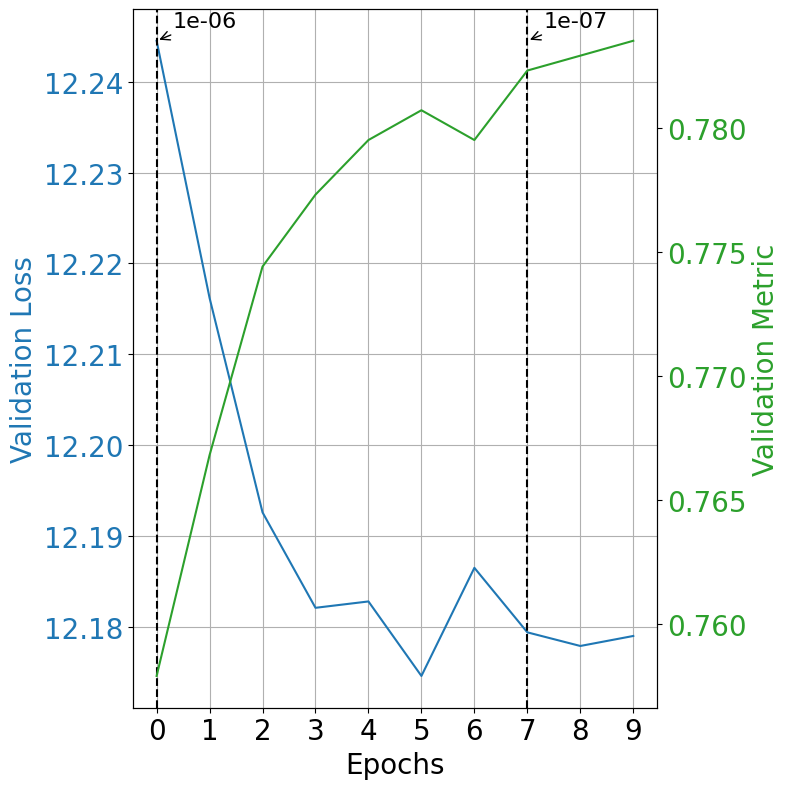

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define colors for different shades of blue and green
colormap = cm.get_cmap('tab10')
train_color = colormap(0)  # Blue
val_color = colormap(2)    # Green

# Plot the results
fig, ax1 = plt.subplots(figsize=(8, 8))  # Squarish figure

# Plot validation loss on the first y-axis
ax1.set_xlabel("Epochs", fontsize=20)  # Increased font size for x-axis label
ax1.set_ylabel("Validation Loss", color=train_color, fontsize=20)  # Increased font size for y-axis label
ax1.plot(epochs, validation_loss, label="Validation Loss", color=train_color)
ax1.tick_params(axis='y', labelcolor=train_color, labelsize=20)  # Increased font size for y-axis ticks
ax1.tick_params(axis='x', labelsize=20)  # Increased font size for x-axis ticks

# Add grid to the plot
ax1.grid(True)

# Set x-ticks to show all epoch numbers
ax1.set_xticks(epochs)

# Create the second y-axis for the validation metric
ax2 = ax1.twinx()
ax2.set_ylabel("Validation Metric", color=val_color, fontsize=20)  # Increased font size for y-axis label
ax2.plot(epochs, validation_metrics, label="Validation Metric", color=val_color)
ax2.tick_params(axis='y', labelcolor=val_color, labelsize=20)  # Increased font size for y-axis ticks

# Add learning rate annotations near vertical lines
for i in range(1, len(learning_rates)):
    if learning_rates[i] != learning_rates[i-1]:
        ax1.axvline(x=epochs[i]-1, linestyle='--', color='black')
        ax1.annotate(f"{learning_rates[i]:.0e}", 
                     xy=(epochs[i]-1, max(validation_loss)),
                     xytext=(epochs[i]-1+ 0.3, max(validation_loss) + 0.0015),
                     arrowprops=dict(facecolor='black', arrowstyle="->"),
                     fontsize=16)
        
ax1.axvline(x=0, linestyle='--', color='black')
ax1.annotate(f"{learning_rates[0]:.0e}", 
                xy=(0, max(validation_loss)),
                xytext=(0+ 0.3, max(validation_loss) + 0.0015),
                arrowprops=dict(facecolor='black', arrowstyle="->"),
                fontsize=16)

# Adjust layout to prevent clipping
fig.tight_layout()

# Show plot
plt.show()


In [73]:
[0]+ epochs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [68]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [67]:
len(epochs)

9

In [66]:
len(validation_loss)

10

In [63]:
len(learning_rates)

10

In [64]:
len( validation_metrics)

10

In [56]:
validation_metric_match 

In [48]:
validation_metric_match = validation_metric_pattern.search(line)
if validation_metric_match:
    validation_metrics.append(float(validation_metric_match.group(1)))  # Extract and append the metric value


In [49]:
validation_metric_match 

<re.Match object; span=(33, 89), match="Validation | Loss: 12.2445 | Metrics: {'Metric': >

In [50]:
validation_metric_match.group(0)

"Validation | Loss: 12.2445 | Metrics: {'Metric': 0.7579}"

In [47]:
validation_metric_match.group(1)

'0.7579'

In [35]:
validation_metric_pattern 

re.compile(r"Validation \| Loss: ([\d.]+) \| Metrics: {'Metric': ([\d.]+)}",
           re.UNICODE)

In [19]:
validation_metric_pattern

re.compile(r"Validation \| Loss: [\d.]+ \| Metrics: \{'Metric': [\d.]\}",
           re.UNICODE)

In [18]:
validation_losses

[]

In [14]:
validation_metric_match

<re.Match object; span=(33, 89), match="Validation | Loss: 12.2445 | Metrics: {'Metric': >